In [94]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

plt.style.use('default')

In [95]:
df = pd.read_csv('insurance.csv', na_values='?')

df.dropna(inplace=True)
df.info

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Aufbau des Datasets

- 1338 Zeilen, 7 Columns
- Charges: Versicherungskosten der Person

<Axes: >

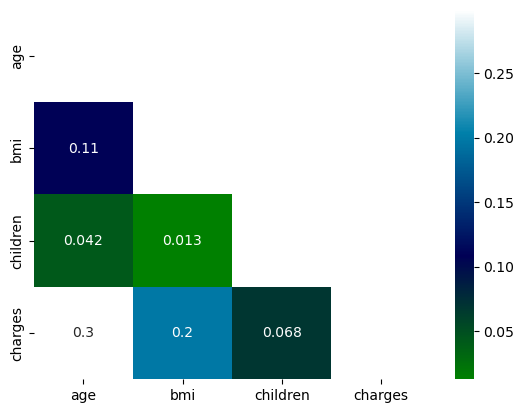

In [96]:
corr_matrix = df.corr(numeric_only=True)

# np.triu = Triangle Upper. Also nur das obere Dreieck wird hier mit dem Ones_like Array gefüllt
# dtype: macht 1 zu True und 0 zu False des Dreiecks
triangle_mask = np.triu(np.ones_like(corr_matrix,  dtype=bool))  # Maske um nur Dreieck anzeigen zu lassen
threshold_mask = np.abs(corr_matrix) < 0  # Diese Maske legt die Maske auf alles fest, das zutrifft. Also wenn Wert unter dem Threshold liegt

multi_mask = np.logical_or(triangle_mask, threshold_mask)

sns.heatmap(corr_matrix, annot=True, cmap="ocean", mask=multi_mask)

<Axes: xlabel='age', ylabel='bmi'>

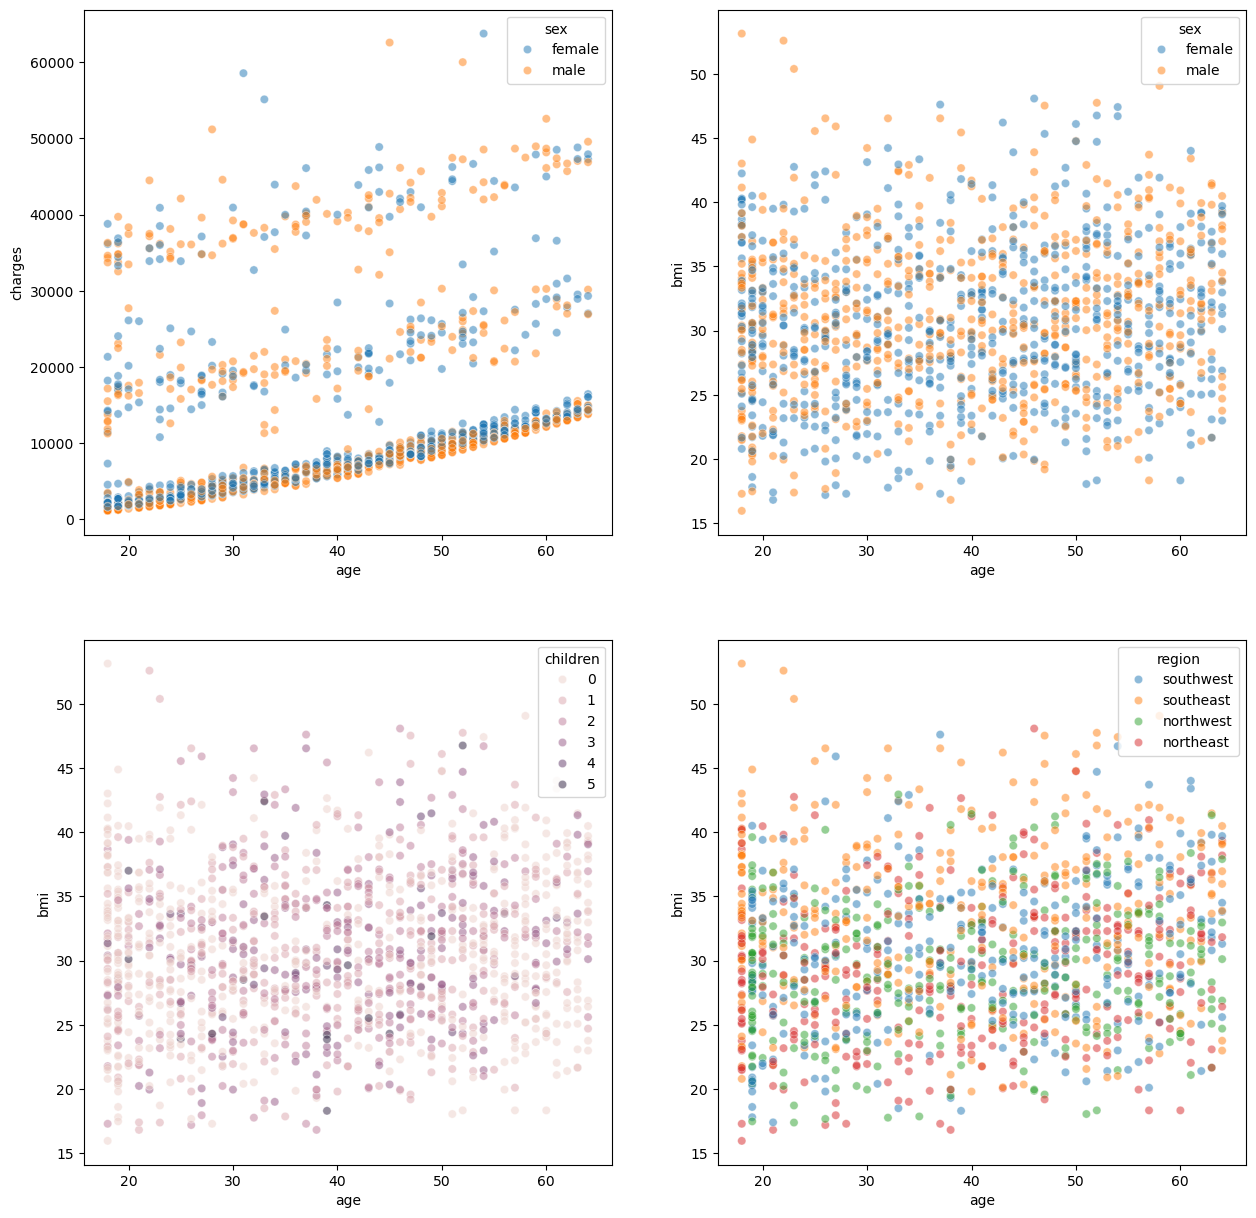

In [98]:
fig, ax = plt.subplots(2,2, figsize=(15, 15))

sns.scatterplot(data=df, x=df['age'], y=df['charges'], alpha=0.5, hue=df['sex'], ax=ax[0,0])
sns.scatterplot(data=df, x=df['age'], y=df['bmi'], alpha=0.5, hue=df['sex'], ax=ax[0,1])
sns.scatterplot(data=df, x=df['age'], y=df['bmi'], alpha=0.5, hue=df['children'], ax=ax[1,0])
sns.scatterplot(data=df, x=df['age'], y=df['bmi'], alpha=0.5, hue=df['region'], ax=ax[1,1])